In [5]:
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# open image and return np array 
 
def openIMG(img_path):
    im2 = Image.open(img_path)              
    im2 = np.array(im2) 
    return im2

(405, 405)


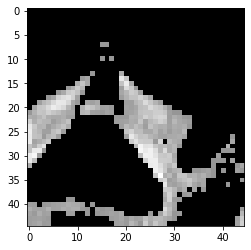

40.35456790123457


In [13]:
thresholded = openIMG('cad_117_threshNoBin.png')
print(thresholded.shape)


plt.imshow(thresholded, cmap = 'gray')
plt.show()


plt.imshow(thresholded[135:135+45, 180:180+45], cmap = 'gray')
plt.show()

print(np.mean(thresholded[135:135+45, 180:180+45]))

(405, 405)


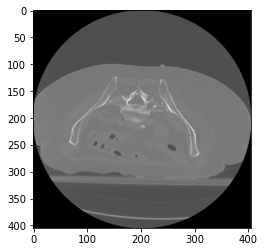

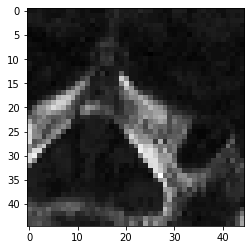

128.37382716049382


In [16]:
grayscale = openIMG('cadaver_slice_117_grey.png')
print(grayscale.shape)

plt.imshow(grayscale, cmap = 'gray')
plt.show()

plt.imshow(grayscale[135:135+45, 180:180+45], cmap = 'gray')
plt.show()

print(np.mean(grayscale[135:135+45, 180:180+45]))